# Project - Medical Effectiveness Evaluation
#### By Gerardo Mora Cuevas

### Exploratory Data Analysis (EDA)

### Dataset: Early Treatment with Prednisolone or Acyclovir in Bell's Palsy

First, let's import the dataset, which is a csv file:

In [1]:
import pandas as pd

df = pd.read_csv("Bells Palsy Clinical Trial.csv")

The 5 first rows are shown bellow:

In [2]:
df.head()

,Patient ID,Sex,Age,Baseline Score on House–Brackmann scale,Time between onset of symptoms and start of treatment,Treatment Group,Received Prednisolone,Received Acyclovir,3-Month Score on House–Brackmann scale,Full Recovery in 3 Months,9-Month Score on House–Brackmann scale,Full Recovery in 9 Months
0,1,Female,77,6,Within 24 hr,Prednisolone–Placebo,Yes,No,2,No,2,No
1,2,Female,61,6,Within 24 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
2,3,Female,46,4,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
3,4,Female,46,3,Within 24 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes
4,5,Female,42,3,>24 to ≤48 hr,Prednisolone–Placebo,Yes,No,1,Yes,1,Yes


Now, what are the dimensions of the dataframe? With the shape function I can find out: 

In [3]:
df.shape

(494, 12)

The dataframe has 494 rows, and 12 columns.

Let's see the information of the dataframe, which includes the name of the columns, if there are null values and the data type:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Patient ID                                             494 non-null    int64 
 1   Sex                                                    494 non-null    object
 2   Age                                                    494 non-null    int64 
 3   Baseline Score on House–Brackmann scale                494 non-null    int64 
 4   Time between onset of symptoms and start of treatment  494 non-null    object
 5   Treatment Group                                        494 non-null    object
 6   Received Prednisolone                                  494 non-null    object
 7   Received Acyclovir                                     494 non-null    object
 8   3-Month Score on House–Brackmann scale                 494 n

From the information above, I can see there are no null values, and the data types are correct.

Now, with the describe() method I can obtain descriptive estadistics from the dataframe:

In [5]:
df.describe(include="all")

,Patient ID,Sex,Age,Baseline Score on House–Brackmann scale,Time between onset of symptoms and start of treatment,Treatment Group,Received Prednisolone,Received Acyclovir,3-Month Score on House–Brackmann scale,Full Recovery in 3 Months,9-Month Score on House–Brackmann scale,Full Recovery in 9 Months
count,494.000000,494,494.000000,494.000000,494,494,494,494,494.000000,494,494.000000,494
unique,NaN,2,NaN,NaN,4,4,2,2,NaN,2,NaN,2
top,NaN,Male,NaN,NaN,Within 24 hr,Acyclovir–Prednisolone,Yes,Yes,NaN,Yes,NaN,Yes
freq,NaN,256,NaN,NaN,249,127,250,249,NaN,358,NaN,441
mean,247.500000,NaN,44.868421,3.680162,NaN,NaN,NaN,NaN,1.340081,NaN,1.143725,NaN
std,142.749781,NaN,14.550357,1.131752,NaN,NaN,NaN,NaN,0.609037,NaN,0.461050,NaN
min,1.000000,NaN,16.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN
25%,124.250000,NaN,34.000000,3.000000,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN
50%,247.500000,NaN,44.000000,4.000000,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN
75%,370.750000,NaN,55.000000,4.000000,NaN,NaN,NaN,NaN,2.000000,NaN,1.000000,NaN


The first insights are:  
-The majority of patients are Male.  
-The average age of all patients is 45 (rounded).  
-The minimum age is 16.  
-The maximum age is 90.  
-The average baseline score on the House-Brackmann scale for all patients is between 3 and 4.  
-Most patients started the treatment within 24 hours that the symptoms appeared.  
-Most patients were part of the Acyclovir-Prednisolone treatment group (127 of them).  


### Exploratory Visualizations

Let's look at the age distribution:

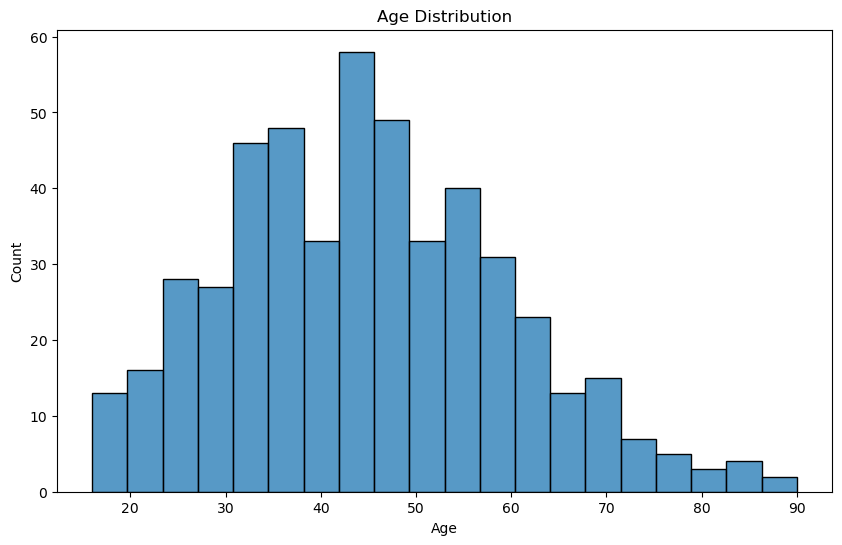

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df["Age"], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

There are more patients around 45 years old.

And now the Treatment Group count:

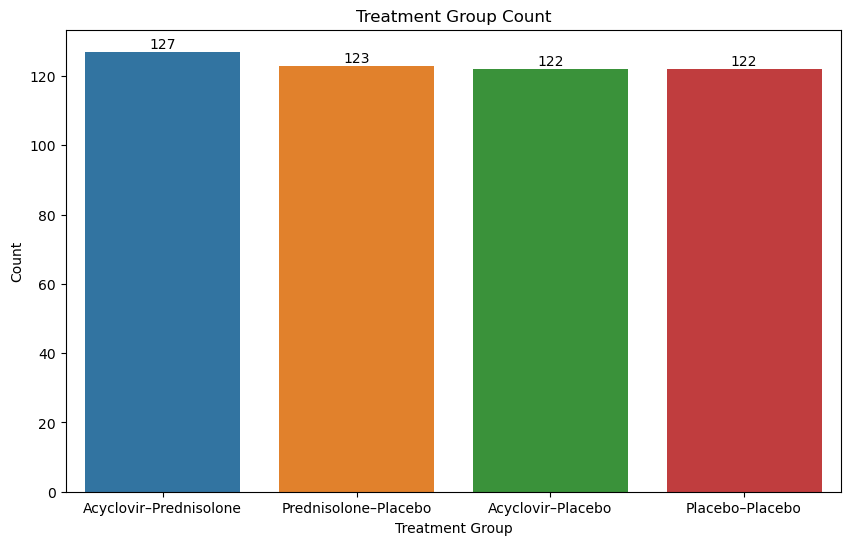

In [7]:
plt.figure(figsize=(10,6))

order = df["Treatment Group"].value_counts().index

sns.countplot(x="Treatment Group", data=df, order=order)
plt.title("Treatment Group Count")
plt.xlabel("Treatment Group")
plt.ylabel("Count")

counts = df["Treatment Group"].value_counts()

for i, count in enumerate(counts):
    plt.text(i,count + 0.1, str(count), ha="center", va="bottom")

plt.show()

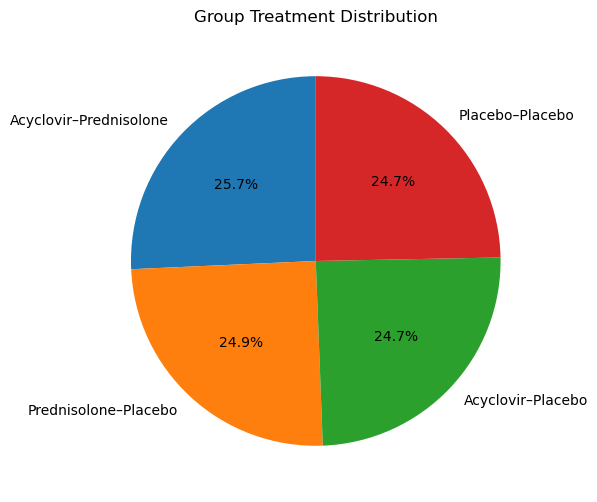

In [8]:
counts = df["Treatment Group"].value_counts()

labels = counts.index
sizes = counts.values

plt.figure(figsize=(10,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Group Treatment Distribution")
plt.show()

The treatment groups have slightly different number of patients. The Acyclovir-Prednisolone group has the most

And how many men and women participated in the trial? 

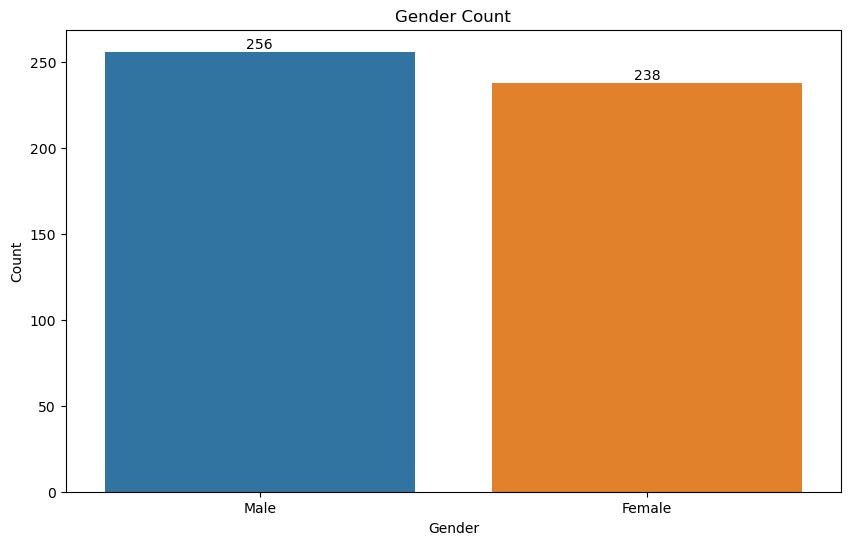

In [9]:
plt.figure(figsize=(10,6))

order = df["Sex"].value_counts().index

sns.countplot(x="Sex", data=df, order=order)
plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")

counts=df["Sex"].value_counts()


for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha="center", va="bottom")
    

plt.show()

Maybe using a pie chart help to better see the gender distribution:


In [10]:
counts

Sex
Male      256
Female    238
Name: count, dtype: int64

There are a little more proportion of male patients than female.

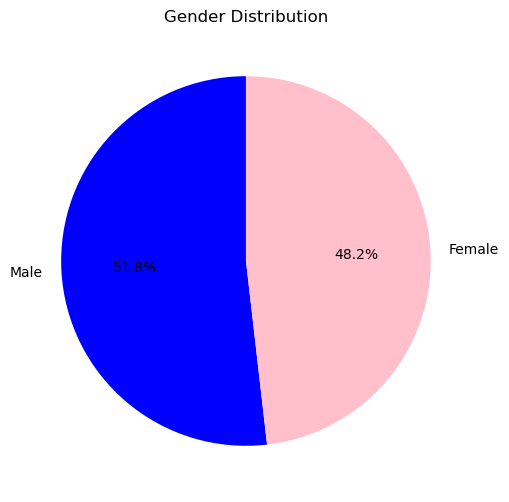

In [11]:
counts = df["Sex"].value_counts()

plt.figure(figsize=(10,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", colors=["blue","pink"],startangle=90)
plt.title("Gender Distribution")
plt.show()

Patients were classified based on the Time between onset of symptoms and start of treatment:

Now let's see how many patients belong to a treatment group male or female:

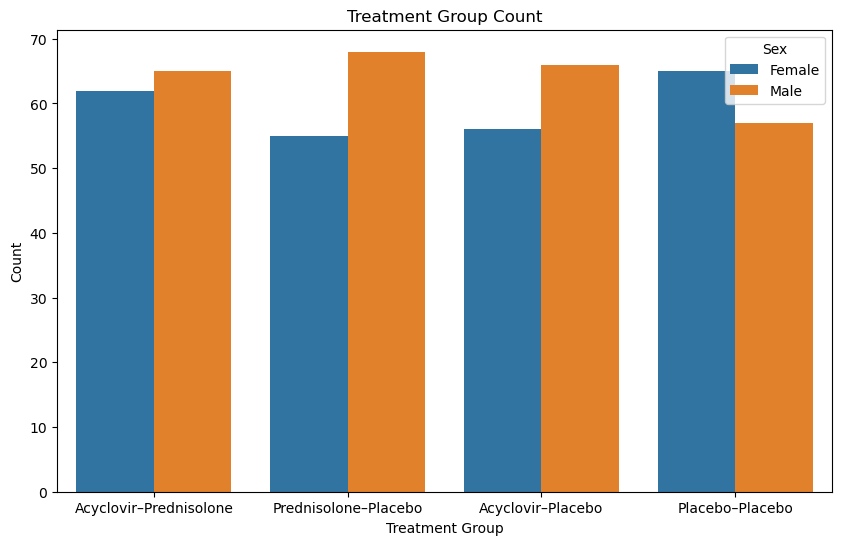

In [12]:
plt.figure(figsize=(10,6))

order = df["Treatment Group"].value_counts().index

sns.countplot(x="Treatment Group", hue="Sex",data=df, order=order)
plt.title("Treatment Group Count")
plt.xlabel("Treatment Group")
plt.ylabel("Count")



plt.show()


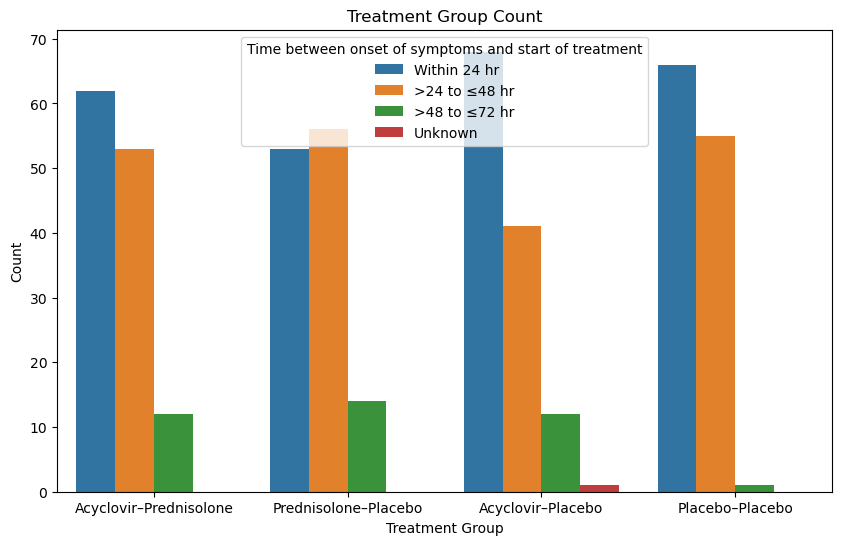

In [13]:
plt.figure(figsize=(10,6))

order = df["Treatment Group"].value_counts().index

sns.countplot(x="Treatment Group", hue="Time between onset of symptoms and start of treatment",data=df, order=order)
plt.title("Treatment Group Count")
plt.xlabel("Treatment Group")
plt.ylabel("Count")



plt.show()

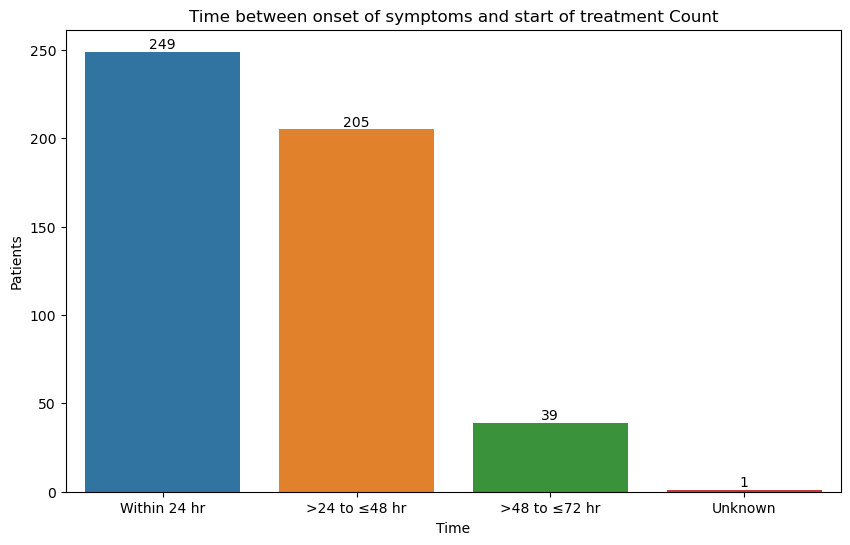

In [14]:
plt.figure(figsize=(10,6))

order = df["Time between onset of symptoms and start of treatment"].value_counts().index

sns.countplot(x="Time between onset of symptoms and start of treatment", data=df, order=order)
plt.title("Time between onset of symptoms and start of treatment Count")
plt.xlabel("Time")
plt.ylabel("Patients")

counts=df["Time between onset of symptoms and start of treatment"].value_counts()


for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha="center", va="bottom")
    

plt.show()

The majority of patients started the treatment within 24 hours that symptoms ocurred.

Let's take a look at the detailed comparison between treatments:

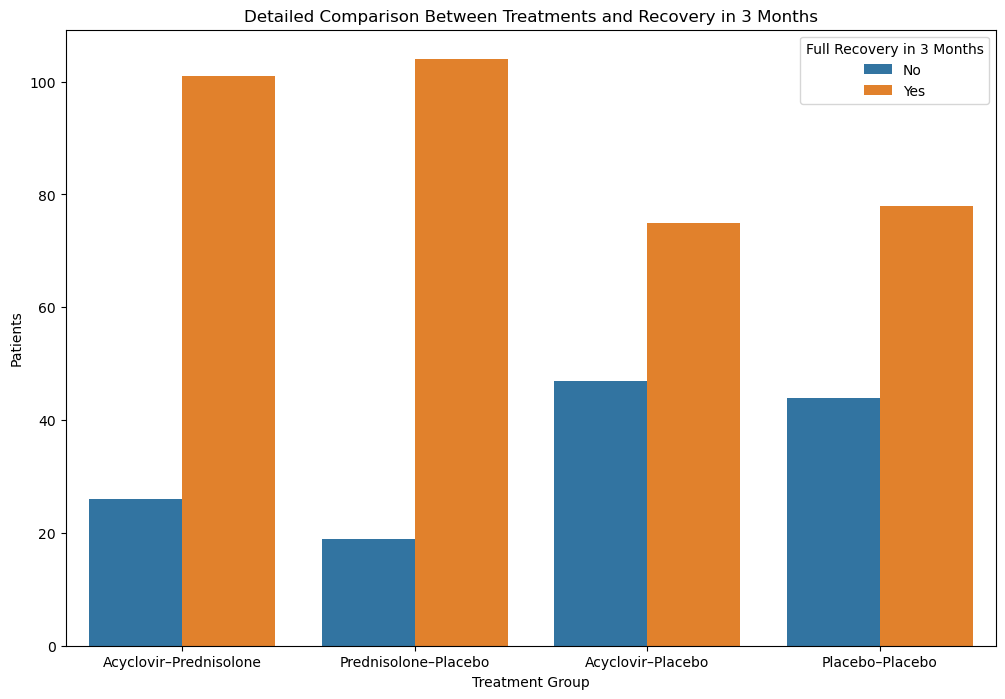

In [15]:
plt.figure(figsize=(12,8))

order = df["Treatment Group"].value_counts().index


sns.countplot(x="Treatment Group", hue="Full Recovery in 3 Months", data=df, order=order)
plt.title("Detailed Comparison Between Treatments and Recovery in 3 Months")
plt.xlabel("Treatment Group")
plt.ylabel("Patients")
plt.show()

I can conclude that the Prednisolone-Placebo group has the most patients that fully recovery in 3 months from bell's plasy. Now, let's take a look at the same parameters but in 9 months:

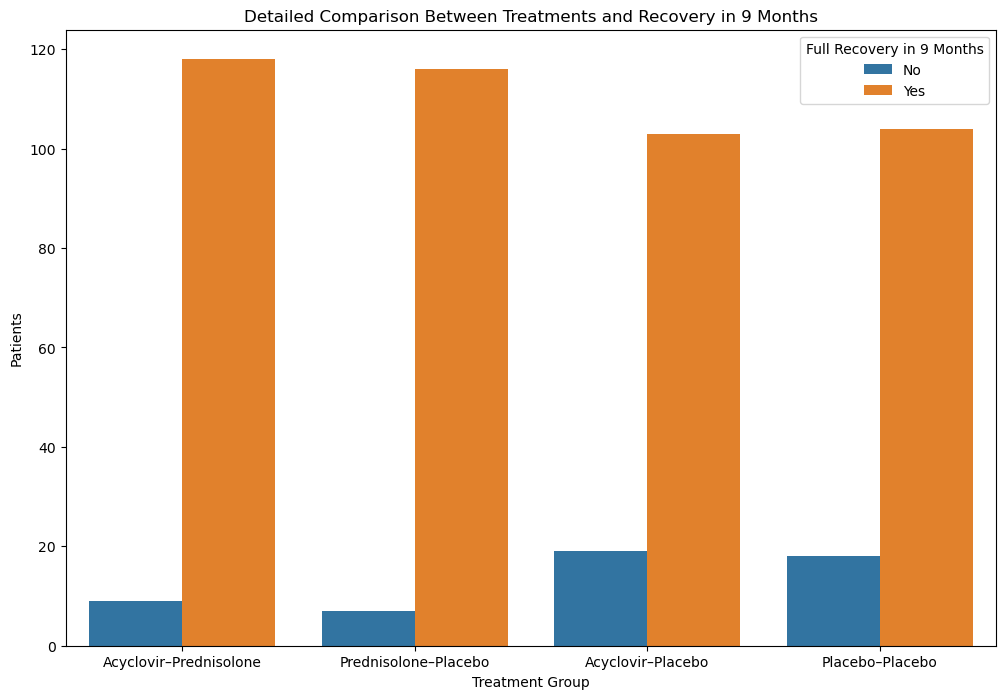

In [16]:
plt.figure(figsize=(12,8))

order = df["Treatment Group"].value_counts().index


sns.countplot(x="Treatment Group", hue="Full Recovery in 9 Months", data=df,order=order)
plt.title("Detailed Comparison Between Treatments and Recovery in 9 Months")
plt.xlabel("Treatment Group")
plt.ylabel("Patients")
plt.show()

After 9 months, it seems that the Acyclovir-Prednisolone has a better performance than Prednisolone-Placebo Group.

And how are the age distributions by gender?

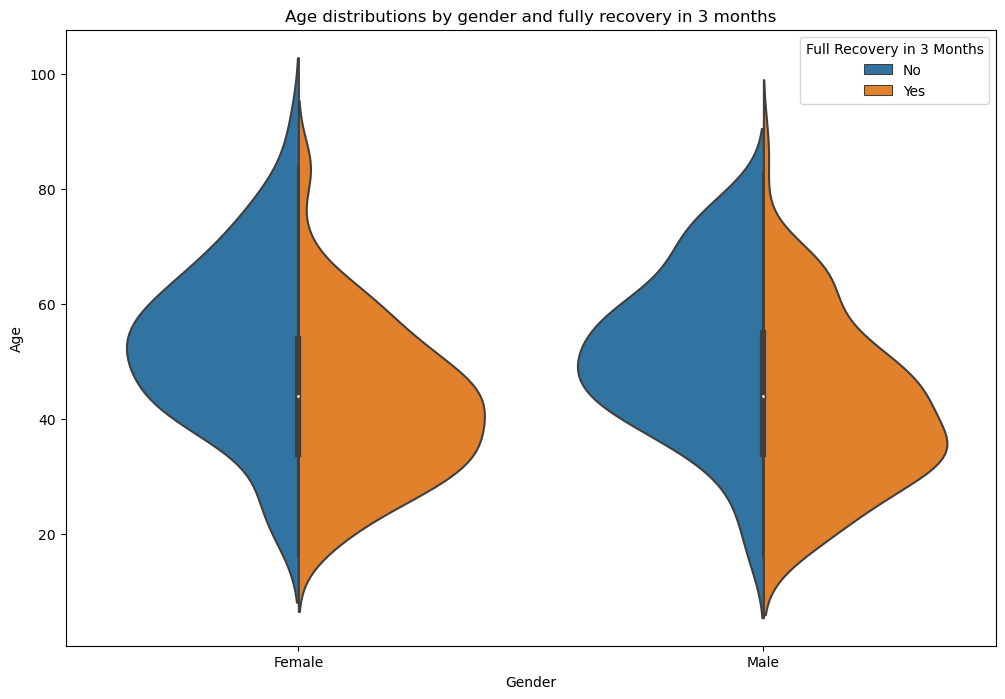

In [17]:
plt.figure(figsize=(12,8))
sns.violinplot(x="Sex",y="Age",data=df,hue="Full Recovery in 3 Months", split=True)
plt.title("Age distributions by gender and fully recovery in 3 months")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()





Based on the violin plot, I conclude that in both genders, the recovery is positive in younger patients.

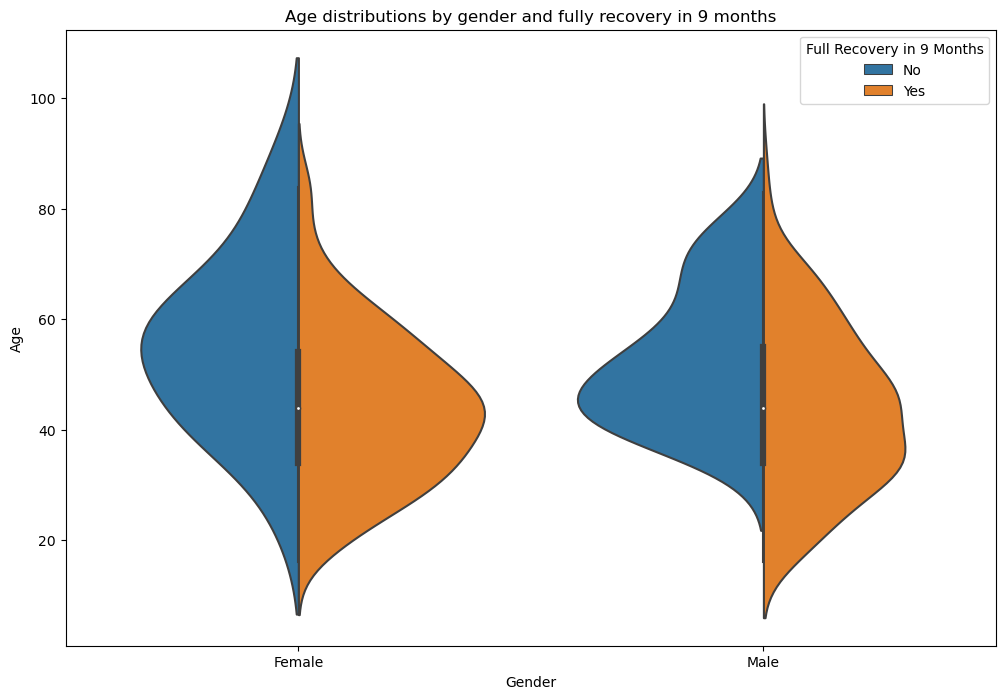

In [18]:
plt.figure(figsize=(12,8))
sns.violinplot(x="Sex",y="Age",data=df,hue="Full Recovery in 9 Months", split=True)
plt.title("Age distributions by gender and fully recovery in 9 months")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()


It didn't change that much. It is very similar to the first violin plot.

Let's compare the recovery when patient recibed Prednisolone:

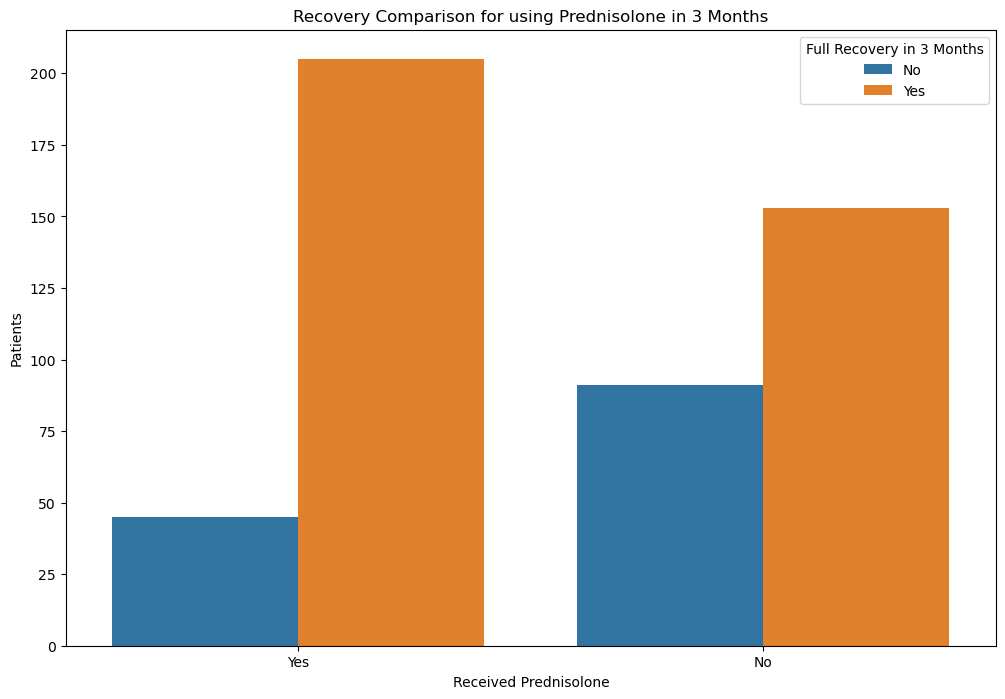

In [19]:
plt.figure(figsize=(12,8))

order = df["Received Prednisolone"].value_counts().index

sns.countplot(x="Received Prednisolone", hue="Full Recovery in 3 Months", data=df,order=order)
plt.title("Recovery Comparison for using Prednisolone in 3 Months")
plt.xlabel("Received Prednisolone")
plt.ylabel("Patients")



plt.show()

And what about after 9 months?

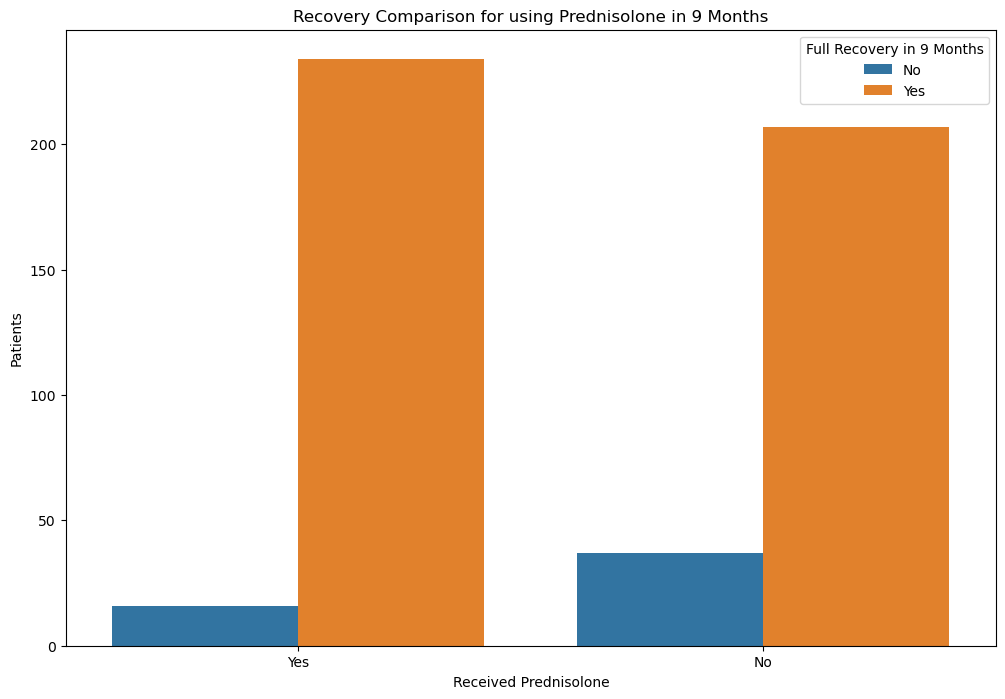

In [20]:
plt.figure(figsize=(12,8))

order = df["Received Prednisolone"].value_counts().index

sns.countplot(x="Received Prednisolone", hue="Full Recovery in 9 Months", data=df,order=order)
plt.title("Recovery Comparison for using Prednisolone in 9 Months")
plt.xlabel("Received Prednisolone")
plt.ylabel("Patients")

plt.show()

Now, let's do the same but instead of Prednisolone, Acyclovir:

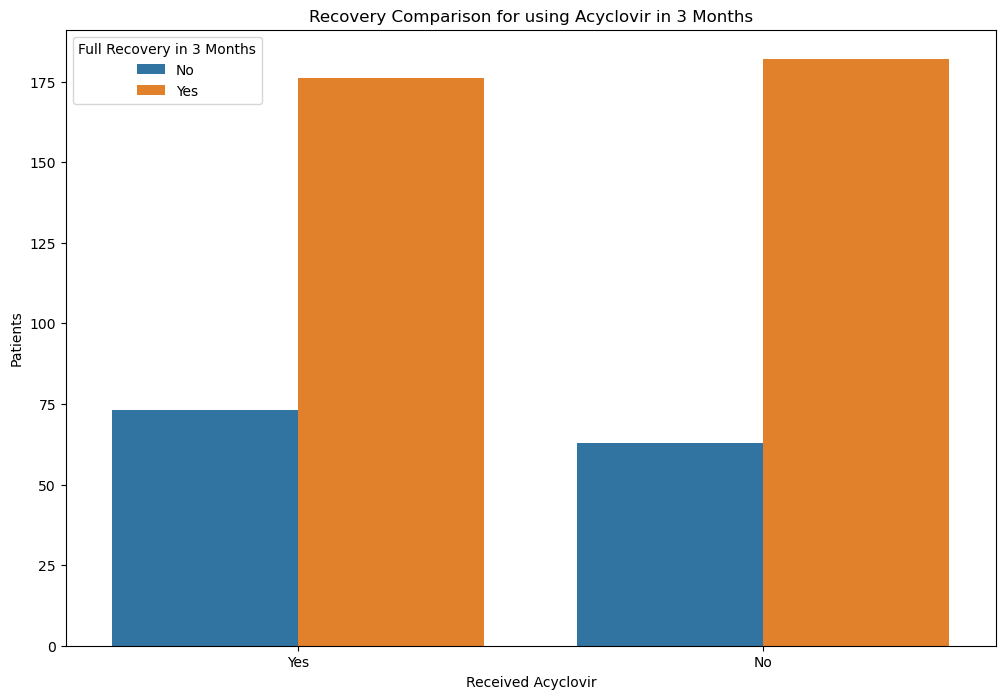

In [21]:
plt.figure(figsize=(12,8))

order = df["Received Acyclovir"].value_counts().index

sns.countplot(x="Received Acyclovir", hue="Full Recovery in 3 Months", data=df,order=order)
plt.title("Recovery Comparison for using Acyclovir in 3 Months")
plt.xlabel("Received Acyclovir")
plt.ylabel("Patients")

plt.show()

An in 9 Months?

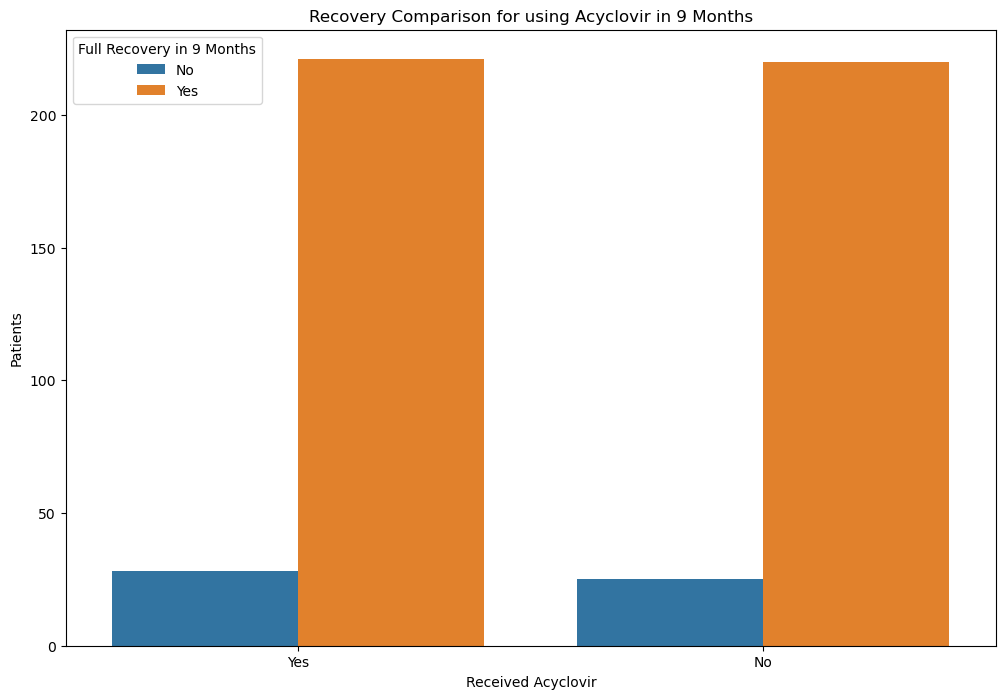

In [22]:
plt.figure(figsize=(12,8))

order = df["Received Acyclovir"].value_counts().index

sns.countplot(x="Received Acyclovir", hue="Full Recovery in 9 Months", data=df,order=order)
plt.title("Recovery Comparison for using Acyclovir in 9 Months")
plt.xlabel("Received Acyclovir")
plt.ylabel("Patients")

plt.show()